In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os

from dotenv import load_dotenv
load_dotenv()  # take environment variables from .env.

TOGETHER_API_KEY = os.environ.get("TOGETHER_API_KEY")

print(f"using TOGETHER_API_KEY ending in {TOGETHER_API_KEY[-4:]}")

def display_base64_image(image_string, image_string_type = "base64_string"):
    
    from IPython.display import display, HTML, Image
    
    if image_string_type ==  "base64_string":
        image_html = f'<img src="data:image/jpeg;base64,{image_string}" />'
        display(HTML(image_html))
        
    elif image_string_type ==  "url":
        display(Image(url=image_string))


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
using TOGETHER_API_KEY ending in c04c


In [22]:
import httpx

model_id = "liuhaotian/llava-v1.6-mistral-7b"

url = 'https://api.together.xyz/v1/completions'

pre_prompt = """
A chat between a human and an AI assistant. 
The assistant says "I am unsure" when the answer is uncertain and
gives helpful, detailed, polite answers to the human's questions
"""

user_utterance = "What is in this image?"

prompt = pre_prompt + f"USER:\n<image>\n{user_utterance}ASSISTANT:"

image_url = "http://images.cocodataset.org/val2017/000000039769.jpg"

display_base64_image(image_url, image_string_type = "url")

headers = {
    "Authorization": f"Bearer {TOGETHER_API_KEY}",
    "accept": "application/json",
    "content-type": "application/json"
}

with httpx.Client() as client:
    result = client.post(
        url, 
        headers=headers,
        json={
            "model": model_id,
            "prompt": prompt,  
            "image_data": image_url,
            "max_tokens": 256,
        },
    )

if result.status_code == 200:
    print(result.json()['choices'][0]['text'])
else:
    print(result.status_code)

 The image features two cats lying on a red couch. The left cat is looking at the right cat, who is looking down with its eyes closed. To the left of the cats, there is a remote control beside the couch. The couch is covered with a pink bedding that includes a blanket. The cats appear to be relaxed and comfortable, and they dominate most of the space in the image. 



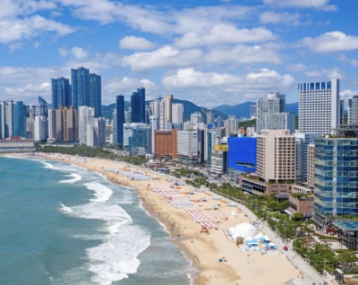


Based on the image, this appears to be an aerial view of a bustling beachfront city filled with towering skyscrapers and some areas of natural beaches. The cityscape suggests it could be located in an Asian country with dense urban development.

With regards to the skin protection, it is advisable to wear sunscreen whenever you venture out to sunny locations, including the ones resembling beaches in the image. Sunscreen helps protect your skin from harmful UV rays, which can lead to sunburn, skin damage, and an increased risk of skin cancer. It is generally recommended to apply an appropriate broad-spectrum sunscreen with an SPF of 30 or higher, even on cloudy days, and to reapply it every two hours or after swimming. In this specific area, the presence of buildings and urban infrastructure would indicate time lost behind the shades, which means that the sunshine, although not directly visible in the photo, could still be quite intense. Therefore, it is essential to practice good sun 

In [26]:
import httpx
import base64

model_id = "liuhaotian/llava-v1.6-mistral-7b"

url = 'https://api.together.xyz/v1/completions'

pre_prompt = """
A chat between a human and an AI assistant. 
The assistant says "I am unsure" when the answer is uncertain and
gives helpful, detailed, polite answers to the human's questions
"""

user_utterance = "What is this picture and do I need to wear sunscreen here?"

prompt = pre_prompt + f"USER:\n<image>\n{user_utterance}ASSISTANT:"

binary_file_content = open('beachdaycity.png', 'rb').read()  
image1_base64_utf8_str = base64.b64encode(binary_file_content).decode('utf-8')

display_base64_image(image1_base64_utf8_str)

headers = {
    "Authorization": f"Bearer {TOGETHER_API_KEY}",
    "accept": "application/json",
    "content-type": "application/json"
}

with httpx.Client(timeout=200) as client:
    result = client.post(
        url, 
        headers=headers,
        json={
            "model": model_id,
            "prompt": prompt,  
            "image_data": f'data:image/jpeg;base64,{image1_base64_utf8_str}',
            "max_tokens": 256,
        },
    )

if result.status_code == 200:
    print(result.json()['choices'][0]['text'])
else:
    print(result.status_code)


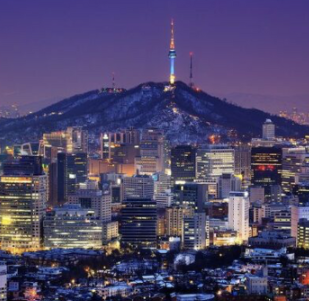

In [ ]:
prev_bot_utter = result.json()['choices'][0]['text']

user_utterance2 = "whats the difference between the previous image and this next one?"

prompt = pre_prompt + \
f"USER:\n{user_utterance}ASSISTANT:{prev_bot_utter}USER:\n<image>\n{user_utterance2}ASSISTANT:"

binary_file_content = open('nightcity.png', 'rb').read() 
image2_base64_utf8_str = base64.b64encode(binary_file_content).decode('utf-8')

display_base64_image(image2_base64_utf8_str)

headers = {
    "Authorization": f"Bearer {TOGETHER_API_KEY}",
    "accept": "application/json",
    "content-type": "application/json"
}

import asyncio
import time

# Assuming url, headers, model_id, prompt, and image data are defined elsewhere

async def stream_response():
    
    data = {
        "model": model_id,
        "prompt": prompt,
        "image_data": f'data:image/jpeg;base64,{image2_base64_utf8_str}',
        "max_tokens": 64,
    }

    async with httpx.AsyncClient(timeout=200) as client:
        async with client.stream("POST", url, headers=headers, json=data) as response:
            if response.status_code == 200:
                start_time = None
                async for chunk in response.aiter_text():
                    if start_time is None:
                        start_time = time.perf_counter_ns()
                    if "[DONE]" in chunk:
                        break
                    print(chunk)
            else:
                print(response.status_code)

await stream_response()